# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Ход исследования**
1. Загрузка данных
2. Предобработка данных
3. Добавление новых столбцов
4. Исследовательский анализ
    - Изучение факторов
    - Фактор скорости продажи квартиры
    - Факторы, влияющие на стоимость
    - Средняя цена 1 кв.м.
    - Средняя стоимость квартир в СПБ на разном удалении от центра
5. Общий вывод

### Загрузка данных

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

In [3]:
#посмотрим, как python прочитал данные
data.head(5)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Мы видим, что таблица немного поехала, потому что разделитель в данной таблице - не запятая, а "\t". Запишем аргумент sep в метод read_csv, и выведем первые 5 строк, чтобы проверить формат:

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
    
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица прочиталась, можно приступать к изучению данных и предобработке.

Изучим информацию о датафрейме методом info():

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Как видим, данные содержат пропуски; 2 столбца представлены булевым типом, 14 столбцов - вещественным типом, 3 - целочисленный тип данных, и 3 - объект. Помимо работы с пропусками предстоит работа с изменением типов данных: столбец ```is_apartment``` вероятно должен быть представлен булевым значением.

Построим гистограмму для датафрейма и посмотрим, как данные выглядят сейчас.

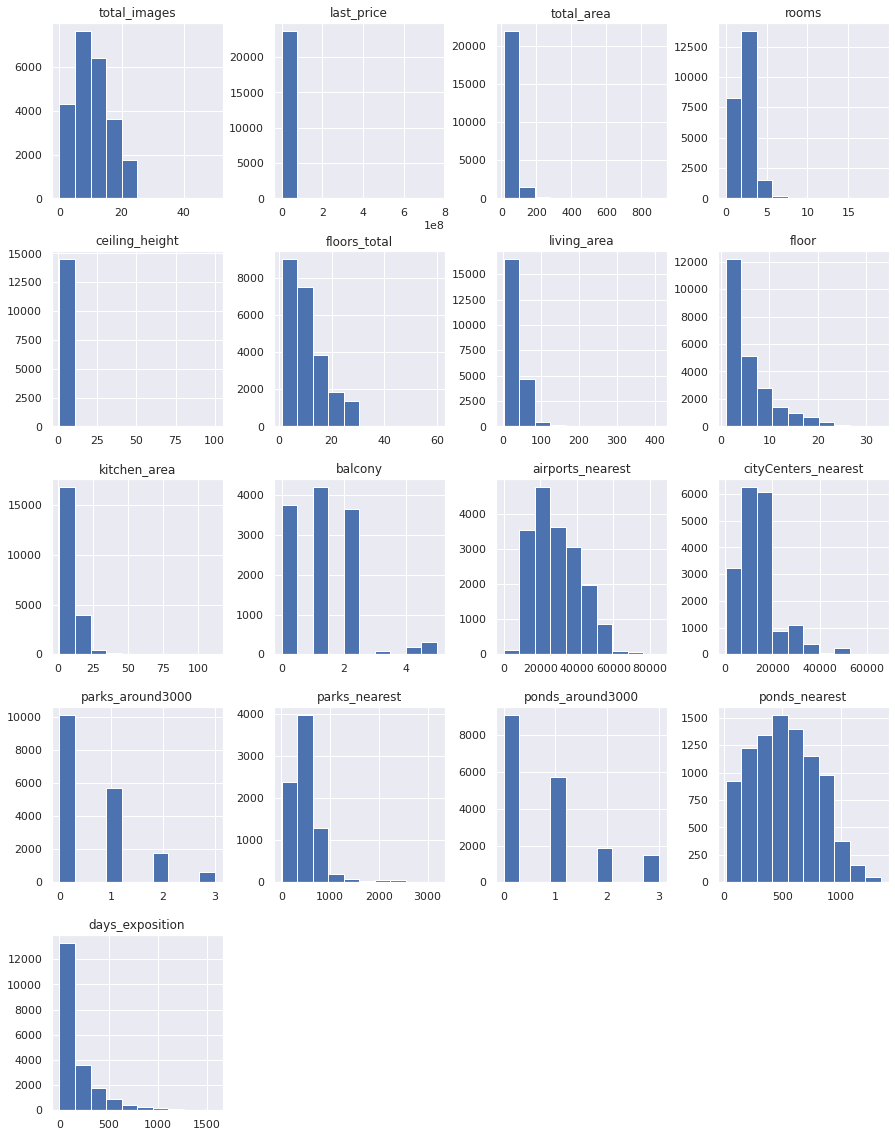

In [6]:
data.hist(figsize=(15, 20))
plt.show()

Ну, графики и графики))) Будем разбираться.

На первый взгляд в столбцах ```park_around3000```, ```ponds_around3000```, ```balcony```, ```ceiling_height``` имеют странные распределения, вероятно из-за имеющихся пропусков в данных. В столбце ```last_price``` распределение последней цены в момент снятия с продажи имеет необъяснимое на первый взгляд распределение - все объявления располагаются в пределах от 0 до 1. Вероятно, нужно изменить шкалу измерений. Но прежде предобработаем данные, удалим или заменим пропуски и дубликаты.

### Предобработка данных

In [7]:
# посмотрим на количество пропусков в столбцов методом isna().sum()
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как мы видим, пропуски в данных имеются у большого числа столбцов:

- ```ceiling_height``` - высота потолков;
- ```floors_total``` - всего этажей в доме;
- ```living_area``` - жилая площадь в квадратных метрах;
- ```is_apartment``` - апартаменты;
- ```kitchen_area``` - площадь кухни в квадратных метрах;
- ```balcony``` - число балконов;
- ```locality_name``` - название населенного пункта;
- ```airport_nearest``` - расстояние до ближайшего аэропорта в метрах;
- ```cityCenters_nearest``` - расстояние до центра города;
- ```parks_around3000``` - число парков в радиусе 3 км;
- ```parks_nearest``` - расстояние до ближайшего парка;
- ```ponds_around3000``` - число водоемов в радиусе 3 км;
- ```ponds_nearest``` - расстояние до ближайшего водоема;
- ```days_exposition``` - сколько дней было размещено объявление;

Также нам известно, что данные представляют собой два вида: одни заполняются пользователем, другие - на основе геопозиции. Предлагаем заполнить пропуски в данных, которые заполняются пользователями.

Например, в столбце ```balcony``` пропуски можно заменить на 0 - обычно пользователи пропускают необязательную информацию к заполнению, если у них нет балкона.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

Можно было бы так сделать со столбцом ```is_apartment```, но количество пропусков больше половины, и часто люди могут не указывать такой фактор специально.

Судя по данным, столбец ```total_area``` без пропусков, при этом есть пропуски в столбцах ```kitchen_area```, ```living_area```. Предлагаем заполнить пропуски в столбцах, выделив среднее отношение площади кухни и жилой площади к общей площади, и умножим на данные коэффициенты значение общей площади там, где есть пропуски.

In [9]:
# проверим значения общей площади с суммой жилой площади и кухни
data[data['total_area'] < data['living_area'] + data['kitchen_area']].shape[0]

64

In [10]:
kitchen_mean = (data['kitchen_area'] / data['total_area']).mean()
living_mean = (data['living_area'] / data['total_area']).mean()

data['living_area'] = data['living_area'].fillna(data['total_area'] * living_mean)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_mean)

In [11]:
data['kitchen_area'].isna().sum()

0

In [12]:
data['living_area'].isna().sum()

0

Следующий столбец - ```ceiling_height```. Можно предположить, что пустые значения возникают из-за незнания высоты помещений, т.к они заполняются вручную. Наиболее вероятно, что высота потолков примерно одинаковая в зависимости от наименования населенного пункта, либо в зависимости от этажа. Предлагаем заполнить данные пропуски медианным значением по столбцу. Но прежде посмотрим, есть ли в данных какие-то выбивающиеся значения.

In [14]:
# проверим наличие неправдободобных потолков
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Да, в столбце действительно есть странные значения - потолки под 20, 35, 100 метров, а также потолки в 1 метр - квартиры для коротышек и гигантов. Предлагаем заменить их на Nan, а затем все пропуски заполнить также медианным значением.

In [15]:
# при помощи логической индексации заменим ненормальные значения на NaN
data.loc[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 6), 'ceiling_height'] = np.NaN

In [16]:
# посмотрим и убедимся, что все значения заменились как надо
data['ceiling_height'].unique()

array([2.7 ,  nan, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57,
       4.15, 3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 ,
       3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87,
       2.66, 2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55,
       3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95,
       4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 ,
       3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63,
       3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19,
       3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 4.4 , 3.28, 3.04,
       4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 , 3.39, 2.69,
       3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42, 2.

In [17]:
# заполним пропуски методом fillna() с помощью медианного значения по столбцу ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [18]:
# удостоверимся в отсутствии пропусков
data['ceiling_height'].isna().sum()

0

Перейдем к пропускам в столбце ```days_exposition```. Посмотрим на характер таких пропусков.

In [19]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Максимальное значение - 1580 дней находилось объявление, рпи этом Q3 равен 232 дня. Загадочное дело. Посмотрим, сколько значений больше 232.

In [20]:
data['days_exposition'][data['days_exposition'] > 232].count(), data['days_exposition'][data['days_exposition'] < 400].count()

(5101, 17873)

Да, в принципе квартиры держатся около года, большая часть меньше 400 дней. Предлагаем не заполнять данные по количеству дней, поскольку это могут быть не снятые с продажи квартиры.

Посмотрим, какие пропуски у нас еще остались.

In [22]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итого критичных пропусков у нас не осталось. Столбец ```is_apartment``` - подозрительный, не совсем понятно, по какому принципу его нужно заполнять, поэтому оставляем. Также мы решили оставить значение ```floors_total``` и ```locality_name```, потому что таких пропусков не так много (менее 100 шт, это меньше 1% от всех записей в датафрейме).

Пропуски в значениях, основанных на геопозиции и заполняемых автоматически мы тоже оставляем, такие данные заполняются не вручную.

Мы обнаружили такое исследование за 2019 год - https://content.knightfrank.com/research/1276/documents/ru/rynok-apartamentov-sankt-peterburg-i-polugodie-2019-goda-6586.pdf - часто люди не указывают в объявлении, что продают апартаменты, потому что в апартаментах нельзя постоянно прописаться и налог идет как на коммерческую недвижимость, что сильно выше, чем на жилую. Поэтому такие квартиры часто убирают из поиска фильтром.

Поэтому заполнять пропуски на False не стоит.

Еще раз посмотрим на типы данных.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Нам необходимо заменить значения в двух столбцах - ```is_apartment``` и ```first_day_exposition```.
Для ```fisrt_day_exposition``` это необходимо, чтобы правильно читать дату и время, и нужно перевсти в тип datetime.
Для ```is_apartment``` должен быть булев тип, но поскольку у нас очень много пропусков, сделаем его вещественным, где True == 1, а False == 0, чтобы можно было проводить хоть какие-то операции или строить гистограммы.

In [24]:
# применяем методы replace и pd.to_datetime
data['is_apartment'] = data['is_apartment'].replace(True, 1, regex=True)
data['is_apartment'] = data['is_apartment'].replace(False, 0, regex=True)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   float64       
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Перейдем к дубликатам. Столбец с названиями у нас один - ```locality_name```. Посмотрим на уникальные значения.

In [26]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Посмотрим, есть ли явные дубликаты.

In [27]:
data.duplicated().sum()

0

В столбце с наименованиями населенных пунктов будут повторения, но нужно убедиться, что неявных дубликатов нет.

Создадим столбец ```clear_name```, и уберем составную часть наименования поселков, снт, и т.д.:

In [28]:
# с помощью метода replace заменяем значения и добавляем в новый столбец
data['clear_name'] = data['locality_name'].str.replace('ё', 'е') \
.replace(['городской поселок ','поселок при железнодорожной станции ', 'поселок городского типа ', 'коттеджный поселок ', \
          'деревня ', 'садовое товарищество ', 'садоводческое некоммерческое товарищество ', 'поселок ', 'станции '], \
         '', regex=True).replace('село ', '', regex=True)

In [29]:
data['clear_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Проверим количество уникальных значений до и после изменения.

In [30]:
len(data['locality_name'].unique()), len(data['clear_name'].unique())

(365, 306)

Дубликаты убраны, типы данных изменены, данные в целом обработали и познакомились с ними. Прекрасно! Перейдем к добавлению новых столбцов в датафрейм.

### Добавление новых столбцов

Создадим столбец ```price_per_kvm```, разделив стоимость на метраж, и округлим значения до 2 знаков после запятой.

In [31]:
# разделим столбцы с ценой на общую площадь и округлим с помощью round(..., 2)
data['price_per_kvm'] = round(data['last_price'] / data['total_area'], 2)

Создадим столбцы ```day_exposition```, ```month_exposition```, ```year_exposition```.

In [32]:
# создадим столбцы, используя свойство weekday и атрибуты month и year
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [33]:
# проверим, как выглядит
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,clear_name,price_per_kvm,day_exposition,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,NaN,False,False,25.000000,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,NaN,False,False,11.000000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,NaN,False,False,8.300000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,89.797718,9,NaN,False,False,69.202282,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,NaN,False,False,41.000000,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,NaN,False,False,9.100000,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,95065.79,0,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,NaN,False,False,14.400000,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,99195.71,3,11,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,40.437211,22,NaN,False,False,18.900000,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,NaN,False,False,8.810000,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,87454.76,2,5,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,NaN,False,False,6.500000,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017


Значения встали, столбцы заполнены. Идем дальше.

Создадим функцию floor_category для категоризации данных по этажам.

In [34]:
def floor_category(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        if (data['floors_total'] == data['floor']) & (data['floor'] != 1):
            return 'последний'
        return 'другой'
    except:
        pass

In [35]:
data['floor_category'] = data.apply(floor_category, axis=1)

In [36]:
data['floor_category'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Добавим столбец ```km_to_center``` - расстояние до центра в км.

In [37]:
data['km_to_center'] = round(data['cityCenters_nearest'] / 1000, 0)

Столбцы мы создали, теперь можно приступать к исследовательскому анализу.

### Исследовательский анализ данных

#### Изучение списка факторов

Первый параметр, который мы рассматриваем - общая площадь ```total_area```. Построим гистограмму.

<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

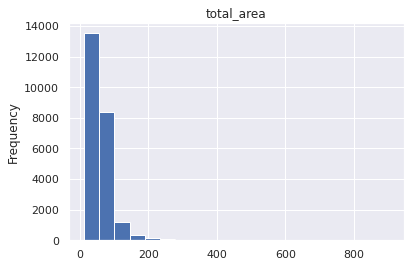

In [38]:
data['total_area'].plot(kind='hist', title='total_area', bins=20, grid=True)
plt.show()

<AxesSubplot:>

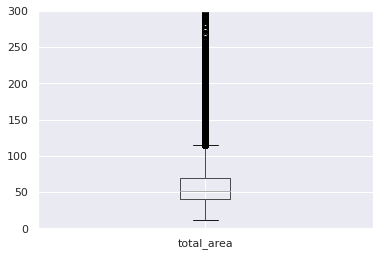

In [39]:
plt.ylim(0, 300)
data.boxplot('total_area')
plt.show()

Посмотрев на ящик с усами, мы увидели, что много значений выходит за пределы примерно 110 метров. Посмотрим на точные значения методом describe()

In [40]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

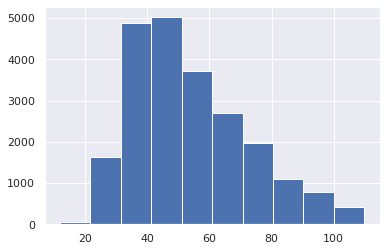

In [41]:
data_total_area = data.query('total_area < 110')
data_total_area['total_area'].hist(grid=True)
plt.show()

Теперь распределение выглядит как надо) Похоже на распределение Пуассона - наибольшее количество квартир в диапазоне от 40 до 50 метров.

Посмотрим на жилую площадь - ```living_area```. Ранее мы уже заполнили аномалии на медианные значения, теперь посмотрим, как выглядит распределение.

<AxesSubplot:>

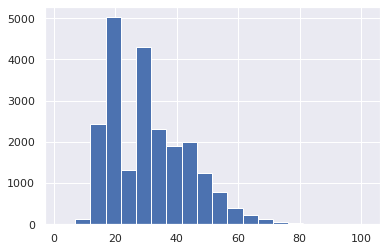

In [43]:
data_total_area['living_area'].hist(grid=True, bins=20)
plt.show()

Странные значения от 21 до 30 метров. Посмотрим на диаграмму boxplot и значения методом describe()

<AxesSubplot:>

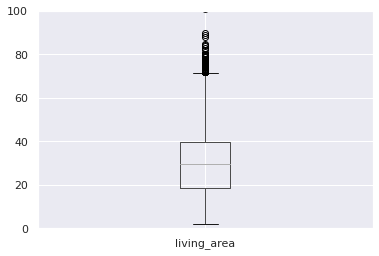

In [44]:
plt.ylim(0, 100)
data_total_area.boxplot('living_area')
plt.show()

In [45]:
data_total_area['living_area'].describe()

count    22279.000000
mean        30.764558
std         12.956161
min          2.000000
25%         18.600000
50%         29.500000
75%         39.800000
max        101.000000
Name: living_area, dtype: float64

Выбросы начинаются от 75 метров. Уберем их из данных, посмотрим нан новую гистограмму.

In [46]:
data_area = data_total_area.query('living_area <= 75')

<AxesSubplot:>

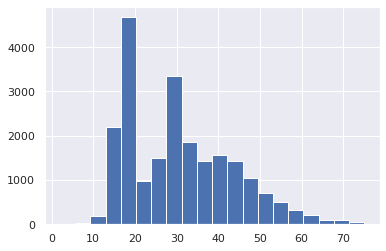

In [47]:
data_area['living_area'].hist(grid=True, bins=20)
plt.show()

Есть двойное нормальное распределение - пики наблюдаем в диапазонах от 15 до 20 м жилой площади и в районе 30 метров.

Перейдем к площади кухни ```kitchen_area```. Также как и с жилой площадью, площадь кухни мы заменили на медианные значения. По аналогии со всеми предыдущими площадями посмотрим на гистограмму, диаграмму размаха и математические значения.

<AxesSubplot:>

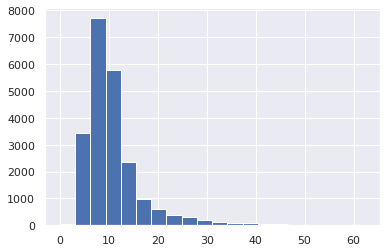

In [48]:
data_area['kitchen_area'].hist(grid=True, bins=20)
plt.show()

Похоже на нормально распределение. Смотрим выбросы.

<AxesSubplot:>

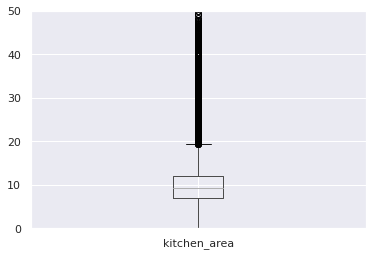

In [49]:
plt.ylim(0, 50)
data_area.boxplot('kitchen_area')
plt.show()

Ого, выбросы есть около нуля и наблюдаются рядом с 17 кв.м.

In [50]:
data_area['kitchen_area'].describe()

count    22235.000000
mean        10.887137
std          5.944206
min          0.000000
25%          7.000000
50%          9.300000
75%         12.000000
max         62.200000
Name: kitchen_area, dtype: float64

Уберем выбросы и посмотрим на гистограмму.

In [51]:
data_area = data_area.query('4 < kitchen_area < 17')

<AxesSubplot:>

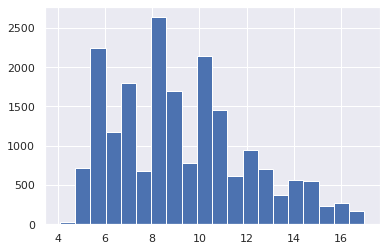

In [52]:
data_area['kitchen_area'].hist(grid=True, bins=20)
plt.show()

Гистограмма отдаленно напоминает нормальное распределение, пики наблюдаются в районе 6 кв.м, от 8 до 9 кв.м. и от 10 до 11 кв.м.

Перейдем к цене объекта - ```last_price```.

<AxesSubplot:>

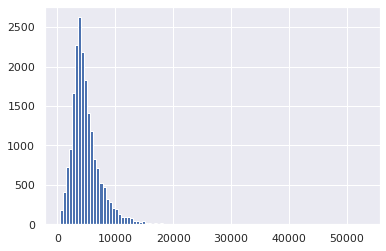

In [53]:
data_area['last_price_thous'] = (data_area['last_price'] / 1000).round()
data_area['last_price_thous'].hist(grid=True, bins=100)

Похоже на нормальное распределение, но все же имеются выбросы от 10 млн и выше. Посмотрим диаграмму размаха.

<AxesSubplot:>

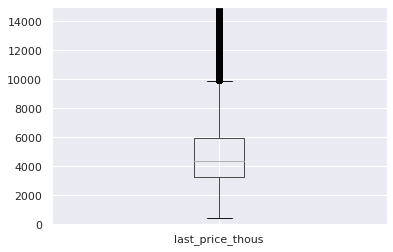

In [54]:
plt.ylim(0, 15000)
data_area.boxplot('last_price_thous')
plt.show()

Выбросы видны как раз свыше стоимости 10 млн, уберем эти выбросы.

In [55]:
data_price = data_area.query('last_price_thous <= 10000')

<AxesSubplot:>

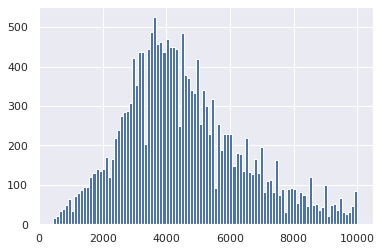

In [56]:
data_price['last_price_thous'].hist(grid=True, bins=100)
plt.show()

Смущают пустые значения, но в целом значения подвержены нормальному распределению, пик приходится на квартиры стоимостью около 3,7 млн. Хорошее было время...

Теперь посмотрим на количество комнат, а точнее, каким образом распределяются квартиры в зависимости от количества комнат.

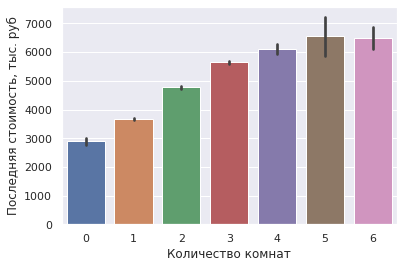

In [57]:
sns.barplot(x = data_price.rooms, y = data_price.last_price_thous).set(xlabel='Количество комнат', ylabel='Последняя стоимость, тыс. руб')
plt.show()

Такая диаграмма вполне логичная, тк зачастую комнат целое количество. Посмотрим на диаграмму размаха и уникальные значения.

In [58]:
data_price['rooms'].unique()

array([1, 2, 3, 4, 0, 5, 6])

Значение 0 комнат - либо выбросы, либо квартиры с октрытой планировкой, в которой количество комнат не считается (кухни за комнаты, как нам известно, тоже не считаются). Промежуточных нецелых значений нет, значит иных выбросов тоже нет.

<AxesSubplot:>

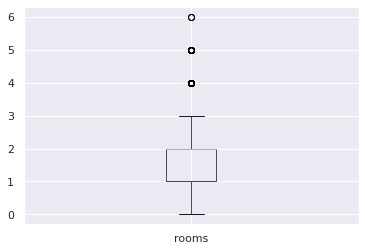

In [59]:
data_price.boxplot('rooms')
plt.show()

Ура, на диаграмме размаха выбросов мы не наблюдаем, отлично! Значит, распределение количества объявлений можно смотреть по имеющимся данным, без удаления выбросов. ДЛя очистки совести посмотрим описательную статистику.

In [60]:
data_price['rooms'].describe()

count    18877.000000
mean         1.868941
std          0.874510
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: rooms, dtype: float64

Таким образом, пик распредлеения приходится на значение, где комнат в квартирах - 1 шт.

Перейдем к параметру ```ceiling_height``` - высота потолков.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

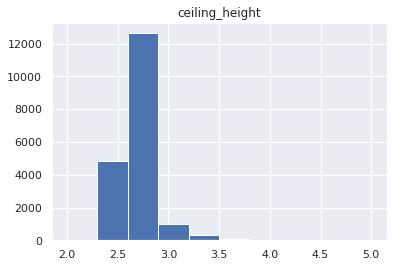

In [61]:
data_price.hist('ceiling_height', grid=True, bins=10)
plt.show()

Тоже похоже на распределение Пуассона, максимальные значения находятся около 2,5 м. Посмотрим также диаграмму размаха для определения выбросов.

<AxesSubplot:>

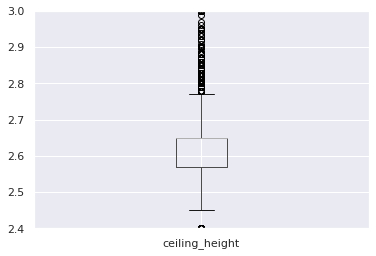

In [62]:
plt.ylim(2.4, 3)
data_price.boxplot('ceiling_height')
plt.show()

А вот тут нас и поджидают выбросы. Межквартильный размах находится в диапазоне от 2.49 до 2.75, все остальное - выбросы. Удалим лишнее.

In [63]:
data_ceiling_height = data_price.query('2.49 <= ceiling_height <= 2.75')

<AxesSubplot:>

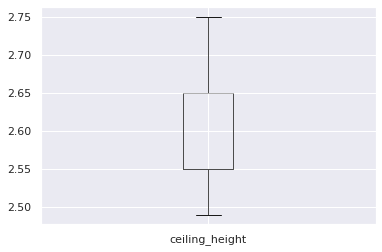

In [64]:
data_ceiling_height.boxplot('ceiling_height')
plt.show()

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

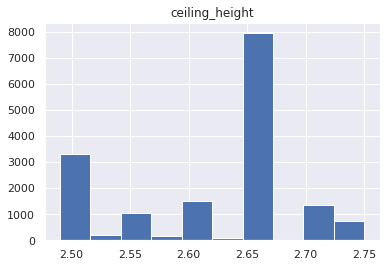

In [65]:
data_ceiling_height.hist('ceiling_height')
plt.show()

Распределение похоже на равномерное, промежуточные значения между 2.5, 2.6 и т.д. имеют резкое снижение ввиду самих данных - мало кто с точностью до мм указывает высоту потолков.

Следующий параметр - тип этажа квартиры ```floor_category```.

<AxesSubplot:xlabel='floor_category'>

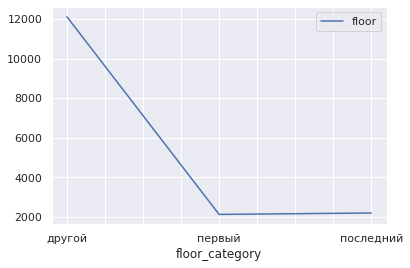

In [66]:
# чтобы не тащить за собой таблицы, будем записывать отфильтрованные таблицы в переменную data_good
data_good = data_ceiling_height
data_good.pivot_table(index='floor_category', values='floor', aggfunc='count').plot(grid=True)
plt.show()

На первом и последнем этаже одинокове количество значений по квартирам. На самом деле не совсем понимаю, каким образом построить гистограмму по категориям.

Следующий параметр - расстояние до центра города в метрах - ```cityCenters_nearest```. Но у нас есть новая переменная, ```km_to_center``` - предлагаем сразу смотреть на нее.

array([[<AxesSubplot:title={'center':'km_to_center'}>]], dtype=object)

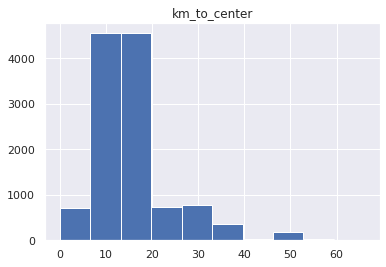

In [67]:
data_good.hist('km_to_center', grid=True, bins=10)
plt.show()

Похоже на равномерное распределение - смотрим диаграмму размаха.

<AxesSubplot:>

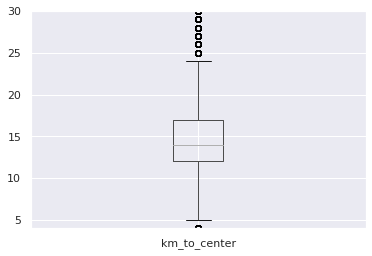

In [68]:
plt.ylim(4, 30)
data_good.boxplot('km_to_center')
plt.show()

In [69]:
data_good['km_to_center'].describe()

count    11918.000000
mean        15.965598
std          8.303193
min          0.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         66.000000
Name: km_to_center, dtype: float64

Благодаря диаграмме размаха мы видим, что выбросы - до 5 км от центра и свыше 24 км. Избавимся от этих выбросов.

In [70]:
data_good_city_center = data_good.query('5 <= km_to_center <= 24')

array([[<AxesSubplot:title={'center':'km_to_center'}>]], dtype=object)

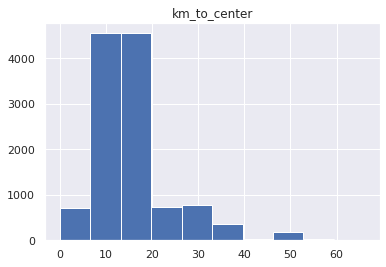

In [71]:
data_good.hist('km_to_center', grid=True, bins=10)
plt.show()

Явно выраженное равномерное распределение! По данной гистограмме мы видим, что наибольшее количество квартир располагается в районе 12.5-15 км от центра.

Переходим к следующему параметру в этом подзадании - расстояние до ближайшего парка в метрах ```parks_nearest```.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

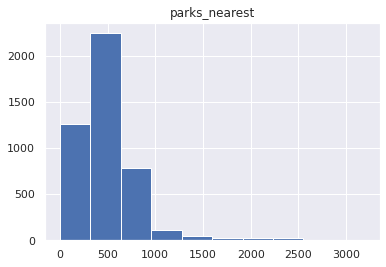

In [72]:
data_good.hist('parks_nearest', grid=True, bins=10)
plt.show()

Данное распределение похоже на распределение Пуассона, однако мы видим выбивающиеся значения от 1500 м. Построим диаграмму размаха.

<AxesSubplot:>

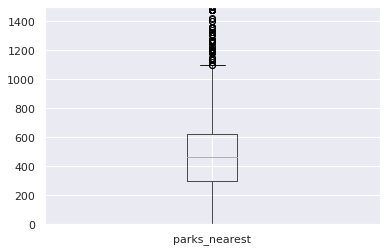

In [73]:
plt.ylim(0, 1500)
data_good.boxplot('parks_nearest')
plt.show()

Все значения свыше 1100 метров - выбросы. Удалим.

In [74]:
data_good = data_good.query('parks_nearest <= 1100')

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

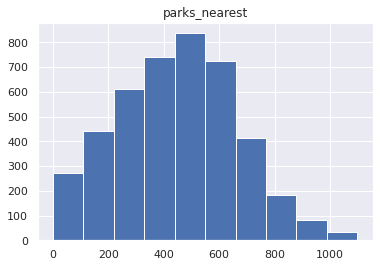

In [75]:
data_good.hist('parks_nearest', grid=True, bins=10)
plt.show()

Знакомое нам нормальное распределение. Наиболшее количество квартир располагается на расстоянии 500 м от парка.

#### Фактор скорости продажи квартиры

Построим гистограмму по столбцу ```days_exposition```. Возьмем уже обработанную таблицу data_good без выбросов по ряду параметров.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

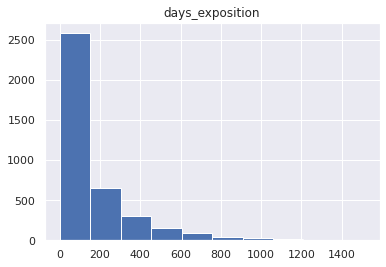

In [76]:
data_good.hist('days_exposition', grid=True, bins=10)
plt.show()

In [77]:
data_good['days_exposition'].describe()

count    3888.000000
mean      164.725309
std       201.972563
min         1.000000
25%        38.000000
50%        86.000000
75%       208.000000
max      1512.000000
Name: days_exposition, dtype: float64

Медиана = 95 дней, среднее - 150 дней. Быстрыми продажами можно считать те, которые продались менее, чем за 95 дней, аномально быстрыми - меньше нижней границы межквартильного размаха. Соотвественно, аномально долго продавались квартиры в диапазоне свыше межквартильного размаха, т.е примерно свыше 200 дней. Даже звучит логично, но для этого нам нужно понимать, что считается периодом продажи.

#### Факторы, которые влияют на полную стоимость объекта

Нам предстоит выяснить, зависит ли цена объекта от следующих факторов:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Можно посмотреть влияние одних переменных на другие с помощью коэффициента корреляции Пирсона, но только для числовых характеристик (т.е. комнаты, этаж и даты размещения лучше посмотреть отдельно).

In [78]:
corr_matrix = data_good.corr()
corr_matrix.loc[['last_price', 'total_area', 'living_area', 'kitchen_area'], \
                ['last_price', 'total_area', 'living_area', 'kitchen_area']]

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.768645,0.635696,0.450673
total_area,0.768645,1.000000,0.921676,0.307808
living_area,0.635696,0.921676,1.000000,0.057624
kitchen_area,0.450673,0.307808,0.057624,1.000000


Напомним критерии корреляции Пирсона: если значение ближе к 1, то переменные изменяются сонаправленно (одна переменная увеличивается, вторая тоже увеличивается), если значение ближе к -1, то переменные изменяются разнонаправленно (одна увеличивается, вторая уменьшается), если значение равно 0 - изменения одной переменной не зависят от изменений другой.

Таким образом, согласно коэффициенту корреляции, можно сказать следующее:
- Стоимость квартиры сильно зависит от общей площади квартиры: 0.768. Логично, чем больше площадь, тем больше стоимость.
- Стоимость квартиры зависит также от жилой площади: 0.635.
- Стоимость квартиры незначительно зависит от площади кухни, мы наблюдаем слабую корр. связь: 0.450

Посмотрим на матрицу диаграмм рассяения

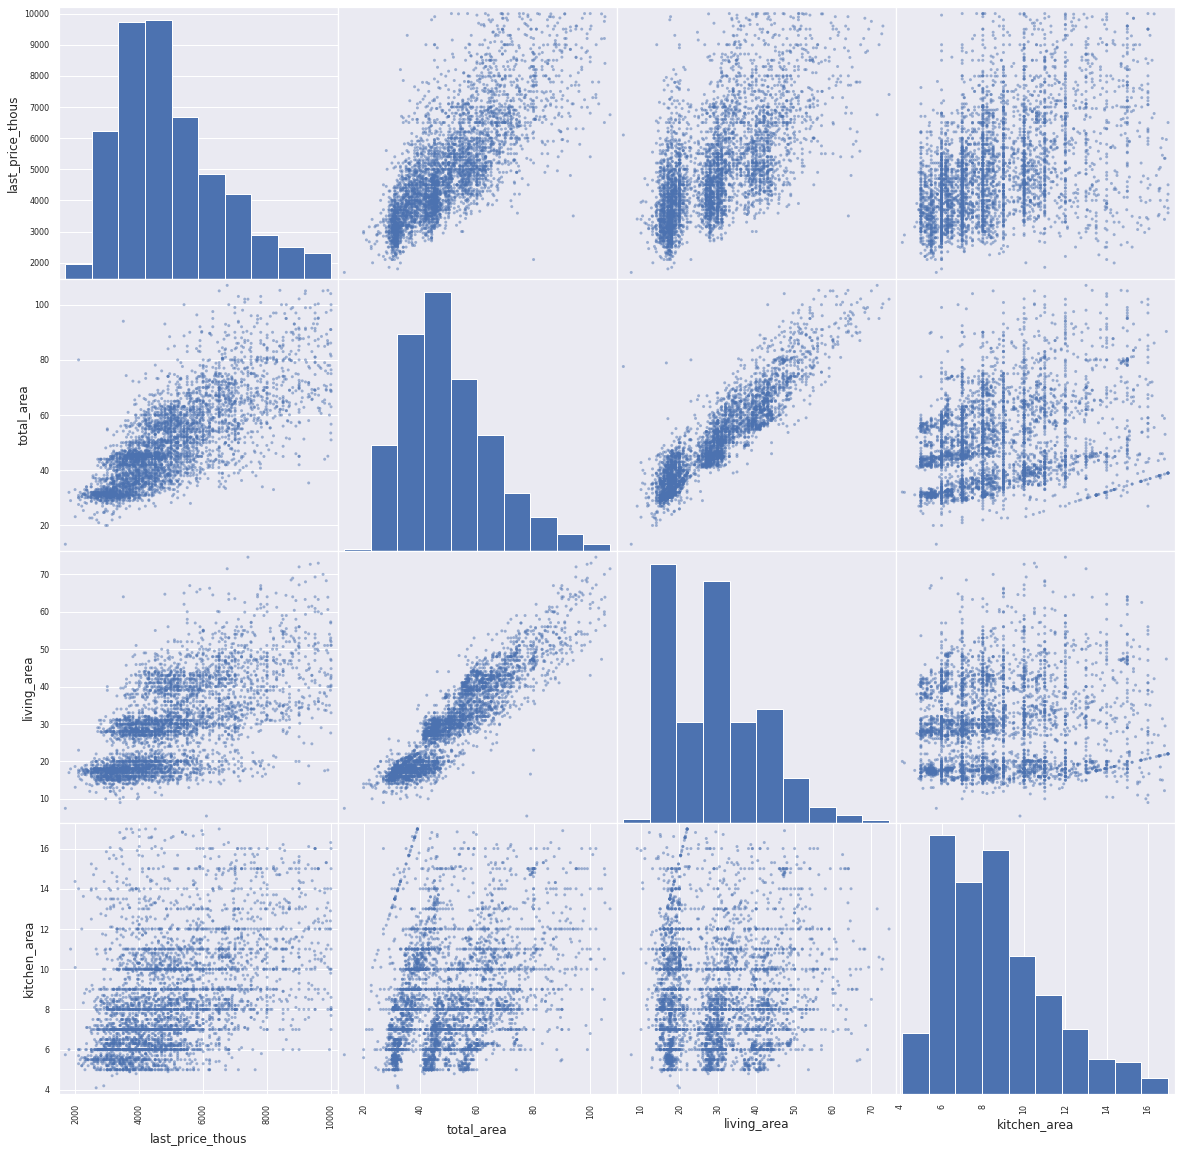

In [79]:
pd.plotting.scatter_matrix(data_good.loc[:, \
                ['last_price_thous', 'total_area', 'living_area', 'kitchen_area']], grid=True, figsize=(20,20))
plt.show()

Какие-то ступенчатые диаграммы рассяения.

По крайней мере мы видим, что стоимость квартир сосредоточена около квартир площадью 20-40 кв.м., и чем больше площадь, тем больше рассеяны показатели стоимости.
Мы наблюдаем четкое скопление количества объявлений в области, где жилая площадь составляет от 13 до 20 метров и около 30 метров, далее значения разбросаны.
А вот распределение стоимости по площади кухни не отражает четкой зависимости, есть скопления по целым значениям 5, 6, 7 и тд кв. метров, но не такие густые, как в предыдущих графиках.

Посмотрим барплоты по факторам количества комнат, этажности, времени размещения объявлений.

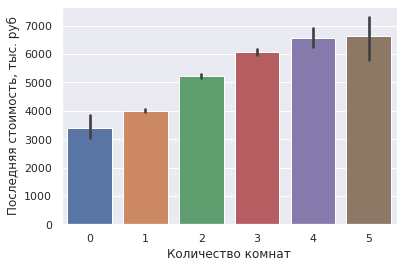

In [80]:
sns.barplot(x = data_good.rooms, y = data_good.last_price_thous).set(xlabel='Количество комнат', ylabel='Последняя стоимость, тыс. руб')
plt.show()

Тут тоже логично - чем больше комнат, тем больше стоимость. Соотвественно, стоиомсть квартиры зависит от количества комнат.

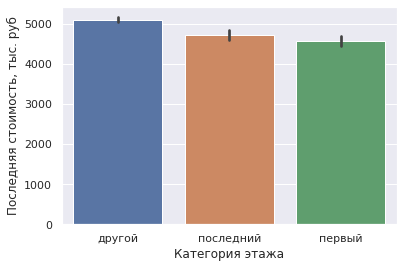

In [81]:
sns.barplot(x = data_good.floor_category, y = data_good.last_price_thous)\
.set(xlabel='Категория этажа', ylabel='Последняя стоимость, тыс. руб')
plt.show()

Здесь можно сказать, что стоимость несильно зависит от этажности квартиры, но на первом этаже они будет чуть дешевле, чем на последнем или другом. Стоит также отметить, что здесь мы учитываем обработанные значения без выбросов.

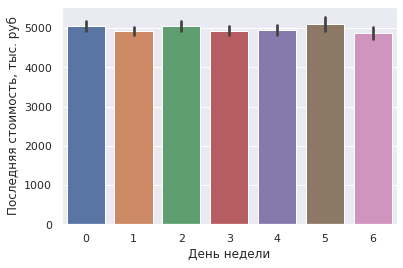

In [82]:
sns.barplot(x = data_good.day_exposition, y = data_good.last_price_thous)\
.set(xlabel='День недели', ylabel='Последняя стоимость, тыс. руб')
plt.show()

И здесь мы видим, что день недели публикации также не влияет на фактор стоимости.

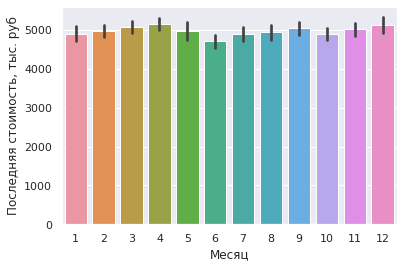

In [83]:
sns.barplot(x = data_good.month_exposition, y = data_good.last_price_thous)\
.set(xlabel='Месяц', ylabel='Последняя стоимость, тыс. руб')
plt.show()

Здесь есть небольшая сезонность - с января по апрель стоимость растет, дальше падает до июня, затем снова растет до сентября, незначительно снижается в октябре, и снова растет к декабрю.

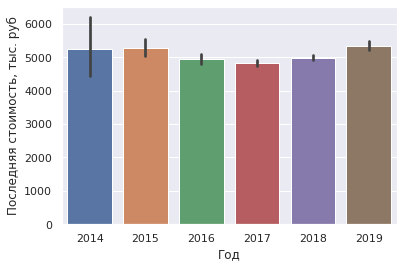

In [84]:
sns.barplot(x = data_good.year_exposition, y = data_good.last_price_thous)\
.set(xlabel='Год', ylabel='Последняя стоимость, тыс. руб')
plt.show()

Стоиомсть объектов в объявлениях в 2015 чуть выше значений 2014-го, затем снижение в 2017 году и повышение вплоть до 2019 года. Мне кажется такое распределение объясняется инфляцией.

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Составим сводную таблицу

In [85]:
# первые 10 населенных пунктов с наибольшим числом объявлений
data_10 = data.pivot_table(index='clear_name', values='price_per_kvm', aggfunc=['count', 'mean'])\
.sort_values(by=('count', 'price_per_kvm'), ascending=False).head(10)

In [86]:
data_10.sort_values(by=('mean','price_per_kvm'))

,count,mean
,price_per_kvm,price_per_kvm
clear_name,,
Выборг,237,58141.909325
Всеволожск,398,68654.473970
Гатчина,307,68746.146515
Колпино,338,75424.579112
Шушары,440,78677.364318
Мурино,590,86087.512017
Парголово,327,90175.913089
Кудрово,472,95324.930508


Самая высокая стоимость кв метра в Санкт-Петербурге - 114 849 рубля за метр, самая низкая в десятке - в Выборге - 58 141 рублей за метр.

#### Средняя стоимость квартир в СПБ на разном удалении от центра.

Составим сводную таблицу 

In [87]:
data_spb = data.query('"Санкт-Петербург" in clear_name')
data_spb['last_price_thous_spb'] = data_spb['last_price'] / 1000
data_spb.pivot_table(index='km_to_center', values='last_price_thous_spb', aggfunc='mean')

/tmp/ipykernel_137/1550755132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['last_price_thous_spb'] = data_spb['last_price'] / 1000


,last_price_thous_spb
km_to_center,
0.0,31449.115852
1.0,21206.720828
2.0,17788.319613
3.0,11126.581003
4.0,13304.279529
5.0,14499.121061
6.0,15338.418387
7.0,14775.152586
8.0,9957.716826


<AxesSubplot:xlabel='km_to_center'>

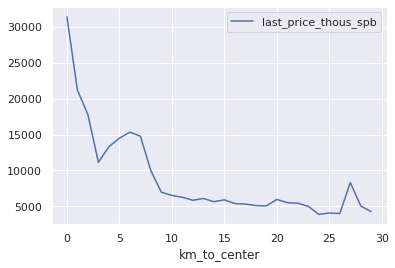

In [88]:
data_spb.pivot_table(index='km_to_center', values='last_price_thous_spb', aggfunc='mean').plot(grid=True)
plt.show()

Чем ближе к центру, тем выше стоимость квартиры.

### Напишите общий вывод

1. В процессе работы были выявлены проблемы с данными, которые заполняются клиентами: много пропусков, выбивающиеся нереалистичные значения. Часть была заполнена медианным значением, некоторые пропуски мы оставили без изменений ввиду отсутствия информации, в частности по столбцу ```is_apartment```.
2. Норма продажи квартиры по времени - 95 дней. Быстрыми продажами можно считать те, которые продались менее, чем за 95 дней, аномально быстрыми - меньше нижней границы межквартильного размаха. Соотвественно, аномально долго продавались квартиры в диапазоне свыше межквартильного размаха, т.е примерно свыше 200 дней.
3. По факторам, влияющим на стоимость квартиры, мы решили посчитать коэффициент Пирсона:
    - Стоимость квартиры сильно зависит от общей площади квартиры: 0.768. Логично, чем больше площадь, тем больше стоимость.
    - Стоимость квартиры зависит также от жилой площади: 0.635.
    - Стоимость квартиры незначительно зависит от площади кухни, мы наблюдаем слабую корр. связь: 0.450
   Что касается факторов количества комнат: чем больше комнат, тем выше стоимость квартиры (это отчасти фактор общей площади квартиры). См диаграмму ниже.

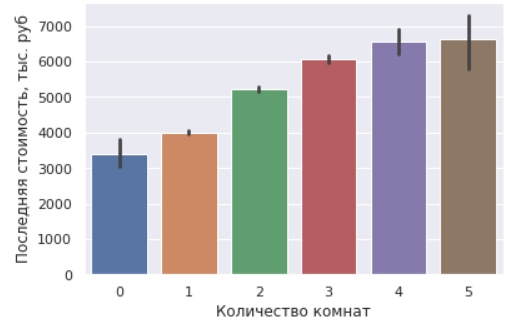

4. Средняя цена за 1кв.м. в населенных пунктах: Самая высокая стоимость кв метра в Санкт-Петербурге - 114 849 рубля за метр, самая низкая в десятке - в Выборге - 58 141 рублей за метр.
5. Средняя стоимость квартир в СПБ на разном удалении от центра представлена на графике:

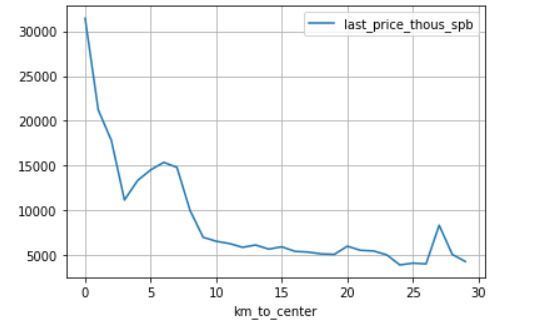